# Markup Function

Tap provides a simple function you can use to generate css + html and showcase your data.

## Setup
First you import tap, create a connection and fetch the schema like normal.

In [ ]:
!pip install 'tapclipy>=0.2.1'

# import tap client and connect functions
from tapclipy import tap_connect

# import our text visual effects
from tapclipy import textvis

# ipython is only used for the benefit of displaying the output in this notebook
from IPython.core.display import display, HTML

# Create TAP Connection
tap = tap_connect.Connect('http://tap.hi2lab.io')

# Create a reference to the Effects class.
effects = textvis.Effects()

# fetch schema
tap.fetch_schema()

print(tap.url())

http://tap.hi2lab.io/graphql


## Reflect Expression Markup

Tap Client can provide markup for Reflect Expression using 3 functions
- make_css = Takes in a dictionary of css rules and returns a formatted string.
- make_reflect_html = This function takes in our StrResult object which is returned by the reflectExpressions query and applies a span to each of the phrase tags that the query provides. You can also pass in a custom class name which will be applied to each phrase tag.
- markup - This function takes in css and html and provides a nice output, Placing the custom css inside a style tag.

### See examples below

### Run the query
First we run the reflectExpressions query to get our strResult

In [2]:
query = tap.query('reflectExpressions')

string = """
Firstly, this week was interesting and what I really liked about it was the picture game we played on monday.  
I was the one who had the picture and I found it hard to communicate exactly what my drawing was, 
which showed me just how important communication is if you want to be successful.  
It was a fun activity and it showed me some good first hand experience about how to communicate.  
Secondly, we got back our memo assignment and I did pretty decent on it but definitely need to rewrite it and work on my memo writing overall.  
I need to work on cutting out the fat and my passive writing style, which I know is going to be hard to change 
but I feel like with a lot of practice I will be able to vastly improve in this area.  
Lastly, we have started to gain a little progress on the team project and have come up with some ideas on how to go about researching our proposition.  
With regards to my action plan I can’t recall working on encouraging the heart within my group, 
so that is something I have to be more aware of when we are meeting and do my best to better myself in this area.  
I do feel like I have began to form some sort of a relationship with my group members, 
but I still need to improve these relationships in order for it to feel like I have really developed long term friendships/relationships within my group.  
This weekend my plan is to work on rewriting my memo and writing up my resume.  
I had a good time in class this week and I am looking forward to what next week has in store for us.
"""

strResult = tap.analyse_text(query, string)

## Generate CSS
We can use the make_css function to generate css by passing in a dictionary of css rules.

In [3]:
# dictionary of css rules we want to apply to our data.
customStyle = {
    "anticipate": {
        "background-color": "red",
        "color": "white"
    },
    "compare": {
        "background-color": "blue",
        "color": "white"
    },
    "consider": {
        "background-color": "green",
        "color": "white"
    }
}



# pass the dictionary into the make_css function from our Effects class
style = effects.make_css(customStyle)

print(style)

.anticipate{
  background-color: red;
  color: white;
}
.compare{
  background-color: blue;
  color: white;
}
.consider{
  background-color: green;
  color: white;
}



## Generate HTML
We can use the make_reflect_html function to process the strResult we had returned from the reflectExpressions query.

This function will wrap each phrase tag inside a span tag and it also takes an optional paramater custom class where we can include a custom class which will be applied to all phrase tags.

For example if we want to apply the class "badge" to every phrase tag we can pass it in as a string.
You can also pass in multiple classes such as "badge title"

In [4]:
# generate html and apply the class badge to each phrase tag
html = effects.make_reflect_html(strResult, "badge")

# generate html without a custom class.
html_nobadge = effects.make_reflect_html(strResult)

print(html)
print("-"*40)
print(html_nobadge)

firstly , this week was interesting and what <span class='generalpronounverb badge'>i really liked about</span> it was the picture game <span class='generalpronounverb badge'>we played on</span> monday .<span class='generalpronounverb badge'>i was</span> the one who had the picture and <span class='consider badge'><span class='generalpronounverb badge'>i found</span></span> it hard to communicate exactly what <span class='selfpossessive badge'>my drawing</span> was , which showed <span class='generalpronounverb badge'>me just how</span> important communication is if <span class='generalpronounverb badge'>you want</span> to be successful .<span class='generalpronounverb badge'>it was</span> a fun activity and <span class='generalpronounverb badge'>it showed</span> me some good first hand experience <span class='pertains badge'>about how to communicate</span> .secondly , <span class='generalpronounverb badge'>we got back</span> <span class='grouppossessive badge'>our memo assignment</spa

# Displaying HTML
Now you can use the display function from Ipython to output html and see the result of your efforts!

Here we display the markup with and without the custom classname "badge"

In [5]:
output = effects.markup(html, style)
display(HTML(output))
print("-"*40)
output = effects.markup(html_nobadge, style)
display(HTML(output))

----------------------------------------


## Generate a HTML Table
You can also generate a nice table to display the results as well as the mark up.
You also have the option to pass in a custom class name.

In [6]:
table_html = effects.make_reflect_table_html(strResult)
table_html_badge = effects.make_reflect_table_html(strResult, "badge")
table_css = effects.get_table_css()

## Put it all together.
Now that we have our css and our html, we can pass it into the markup function and get our final output.

In [7]:
output = effects.markup(table_html, style + table_css)
display(HTML(output))

No,Sentence,Meta Tags
1,"firstly , this week was interesting and what i really liked about it was the picture game we played on monday .",nil
2,"i was the one who had the picture and i found it hard to communicate exactly what my drawing was , which showed me just how important communication is if you want to be successful .",nil
3,it was a fun activity and it showed me some good first hand experience about how to communicate .,nil
4,"secondly , we got back our memo assignment and i did pretty decent on it but definitely need to rewrite it and work on my memo writing overall .",nil
5,"i need to work on cutting out the fat and my passive writing style , which i know is going to be hard to change but i feel like with a lot of practice i will be able to vastly improve in this area .",nil
6,"lastly , we have started to gain a little progress on the team project and have come up with some ideas on how to go about researching our proposition .",nil
7,"with regards to my action plan i ca n't recall working on encouraging the heart within my group , so that is something i have to be more aware of when we are meeting and do my best to better myself in this area .",nil
8,"i do feel like i have began to form some sort of a relationship with my group members , but i still need to improve these relationships in order for it to feel like i have really developed long term friendships / relationships within my group .",nil
9,this weekend my plan is to work on rewriting my memo and writing up my resume .,nil
10,i had a good time in class this week and i am looking forward to what next week has in store for us .,nil


In [8]:
output = effects.markup(table_html_badge, style + table_css)
display(HTML(output))

No,Sentence,Meta Tags
1,"firstly , this week was interesting and what i really liked about it was the picture game we played on monday .",nil
2,"i was the one who had the picture and i found it hard to communicate exactly what my drawing was , which showed me just how important communication is if you want to be successful .",nil
3,it was a fun activity and it showed me some good first hand experience about how to communicate .,nil
4,"secondly , we got back our memo assignment and i did pretty decent on it but definitely need to rewrite it and work on my memo writing overall .",nil
5,"i need to work on cutting out the fat and my passive writing style , which i know is going to be hard to change but i feel like with a lot of practice i will be able to vastly improve in this area .",nil
6,"lastly , we have started to gain a little progress on the team project and have come up with some ideas on how to go about researching our proposition .",nil
7,"with regards to my action plan i ca n't recall working on encouraging the heart within my group , so that is something i have to be more aware of when we are meeting and do my best to better myself in this area .",nil
8,"i do feel like i have began to form some sort of a relationship with my group members , but i still need to improve these relationships in order for it to feel like i have really developed long term friendships / relationships within my group .",nil
9,this weekend my plan is to work on rewriting my memo and writing up my resume .,nil
10,i had a good time in class this week and i am looking forward to what next week has in store for us .,nil


## Affect Expressions Markup
Tap client can provide markup for Affect Expressions using the make_affect_html function.

make_affect_html takes 3 parameters
- input_text = this is the original text that you ran the affectExpressions query on
- affect_data = This is the strResult that you received back from the affectExpressions query.
- custom_class = This is where you are able to include a custom class to apply to each word that is returned by the query.

This function will display the words returned by the affectExpressions query and adjust their css based on the results.

- Valence = Valence will adjust the word color, The higher the valence the redder the word will become, The less valence the more blue the word will be.
- Arousal = The higher the arousal in the word the thicker the word will become.
- Dominance = the higher the dominance value is the larger the word will appear.


### Example Below
First we run the affectExpressions query and get the strResult returned


In [9]:
query = tap.query('affectExpressions')

string = """
Firstly, this week was interesting and what I really liked about it was the picture game we played on monday.  
I was the one who had the picture and I found it hard to communicate exactly what my drawing was, 
which showed me just how important communication is if you want to be successful.  
It was a fun activity and it showed me some good first hand experience about how to communicate.  
Secondly, we got back our memo assignment and I did pretty decent on it but definitely need to rewrite it and work on my memo writing overall.  
I need to work on cutting out the fat and my passive writing style, which I know is going to be hard to change 
but I feel like with a lot of practice I will be able to vastly improve in this area.  
Lastly, we have started to gain a little progress on the team project and have come up with some ideas on how to go about researching our proposition.  
With regards to my action plan I can’t recall working on encouraging the heart within my group, 
so that is something I have to be more aware of when we are meeting and do my best to better myself in this area.  
I do feel like I have began to form some sort of a relationship with my group members, 
but I still need to improve these relationships in order for it to feel like I have really developed long term friendships/relationships within my group.  
This weekend my plan is to work on rewriting my memo and writing up my resume.  
I had a good time in class this week and I am looking forward to what next week has in store for us.
"""

strResult = tap.analyse_text(query, string)

Now that we have our strResult we can pass that into the make_affect_html function. here we pass the "badge" custom class, but feel free to change it or remove it entirely. 

By using the above make_css function you can also apply styling to your custom class.

In [10]:
affect_html = effects.make_affect_html(string, strResult, "badge")
display(HTML(affect_html))

## Vocabulary Markup
Tap client can provide markup for Vocabulary using the make_vocab_graph function.

This function takes in the strResult returned from vocabulary and returns a dictionary with 2 arrays. values and labels.

Combined with matplotlib you can easily create a graph.

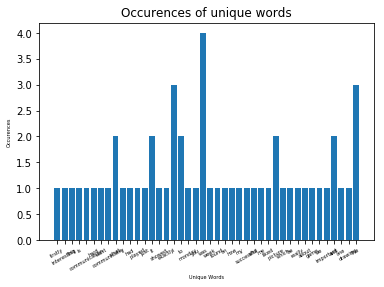

In [12]:
# first we import matplitlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# run our vocab query
query = tap.query('vocabulary')

# We need text to query
string = """
Firstly, this week was interesting and what I really liked about it was the picture game we played on monday.  
I was the one who had the picture and I found it hard to communicate exactly what my drawing was, 
which showed me just how important communication is if you want to be successful.
"""

strResult = tap.analyse_text(query, string)

graph_data = effects.make_vocab_graph(strResult)

labels = graph_data['labels']
values = graph_data['values']
        
# create our index from our list of labels
index = np.arange(len(labels))
plt.bar(index, values)
plt.xlabel('Unique Words', fontsize=5)
plt.ylabel('Occurences', fontsize=5)
plt.xticks(index, labels, fontsize=5, rotation=30)
plt.title('Occurences of unique words')
plt.show()